4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 67s 45ms/step - loss: 0.3617 - accuracy: 0.8698 - val_loss: 0.2871 - val_accuracy: 0.8938
Epoch 3/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.3156 - accuracy: 0.8864 - val_loss: 0.2655 - val_accuracy: 0.9019
Epoch 4/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2826 - accuracy: 0.8981 - val_loss: 0.2488 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2579 - accuracy: 0.9057 - val_loss: 0.2422 - val_accuracy: 0.9125
Epoch 6/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2391 - accuracy: 0.9124 - val_loss: 0.2382 - val_accuracy: 0.9133
Epoch 7/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2242 - accuracy: 0.9161 - val_loss: 0.2354 - val_accuracy: 0.9163
Epoch 8/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2098 - accuracy: 0.9231 - val_loss: 0.2254 - val_accura

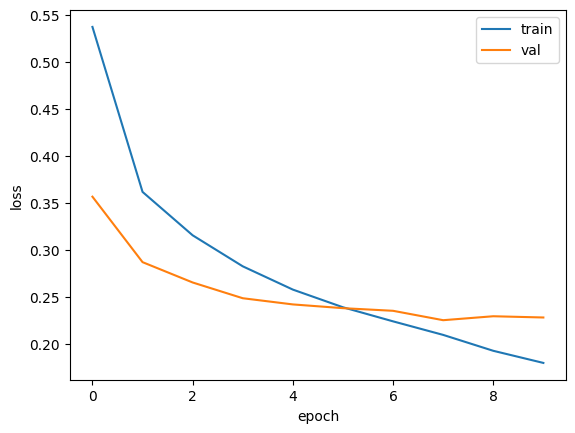

375/375 [==============================] - 6s 16ms/step - loss: 0.2254 - accuracy: 0.9187


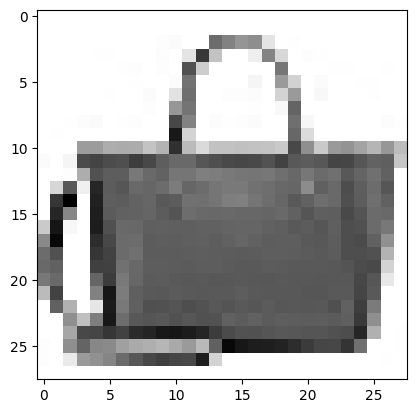

1/1 [==============================] - 0s 151ms/step


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 # (48000,28,28) 크기의 3차원 배열이 배치차원인 48000개의 샘플이 (28,28,1) 크기가 된다. (48000,28,28,1)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) # 32개 필터, 커널(3,3), 렐루 활성화함수, 세임패딩, 초창기 모델에 추가할 때 input_shape(위의 예시에서는 3차원) 무조건 넣기
model.add(keras.layers.MaxPooling2D(2)) # 풀링 (2,2)로 진행. (14,14,32)기 된다.
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 64개 필터, 커널(3,3) -> (7,7,64)가 된다.
model.add(keras.layers.Flatten()) # 1차원으로 평탄화
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층 계산(relu)
model.add(keras.layers.Dropout(0.4)) # 40%는 랜덤으로 드롭아웃함.
model.add(keras.layers.Dense(10, activation='softmax')) # 밀집층 계산(softmax)
model.summary()
# 처음 param = 3x3x1x32 + 32(절편) = 320개 파라미터 -> Pooling -> 3x3x32x64 + 64 = 18496개 파라미터, Pooling -> (7,7,64)이므로 1차원으로 펼치면 (3136,)이고 100개의 뉴런과 연결하니 3136x100 + 100 = 313700이다.
keras.utils.plot_model(model) # 층의 구성을 그림으로 표현해줌
keras.utils.plot_model(model, show_shapes=True) # show_shapes=True로 하면 입력과 출력의 크기를 알려준다.
# to_file 매개변수에 파일 이름을 지정하면 출력한 이미지를 파일로 저장한다.
# dpi 매개변수로 해상도를 지정할 수 있다.

# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() #시각화 -> 9번째 에포크가 최적

model.evaluate(val_scaled, val_target)

# 흑백 이미지에 차원이 없으므로 reshape()로 2차원으로 변경한다.
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r') # 단순 그림 그리기는 2차원 사용
plt.show()

preds = model.predict(val_scaled[0:1])

plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show() # 가방 말고는 확률 거의 0
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

import numpy as np
print(classes[np.argmax[preds]])

test_scaled = test_input.reshape(-1,28,28,1) / 255.0  # 샘플 개수, 28*28이미지, rgb가 없으므로 1로 한다.
model.evaluate(test_scaled, test_target)
